### 해당 모델 관련한 내용
1. 이론
- n개의 샘플로 구성된 피처 행렬X를 중심이 K개의 군집으로 분할
$$J(\mu_1, \dots, \mu_j) = \sum_{i=1}^{n}min_{\mu_j \in{C}}({\parallel x_i - \mu_j \parallel ^2})$$
- K개의 중심을 임의로 고른다.
- 각 샘플에서 가장 가까운 중심을 해당 샘플을 포함한 군집의 중심으로 정한다.
- 군집별 샘플 피처값의 평균을 계산하여 이를 군집의 새로운 중심으로 업데이트 한다.
- 더는 중심이 변하지 않거나 변화가 임계값 이하일 때까지 반복한다.

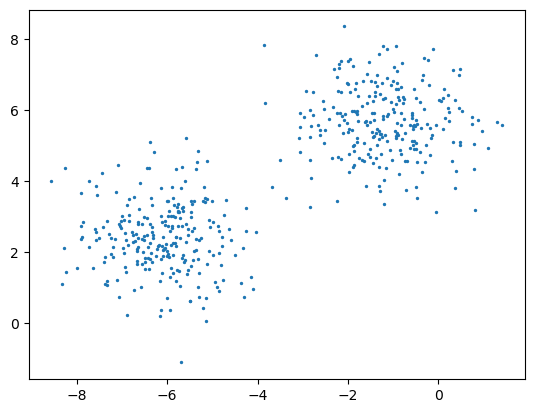

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

X = make_blobs(n_samples=500, centers=2, random_state=1234)[0]
plt.scatter(X[:, 0], X[:, 1], s=2)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

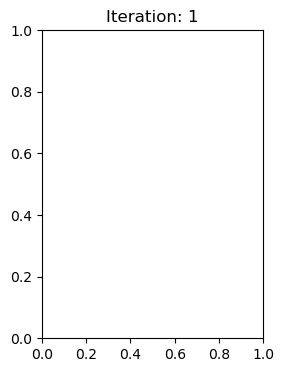

In [4]:
np.random.seed(1234)
cluster = np.zeros(X.shape[0])
centroid_old = X[np.random.randint(X.shape[0], size=2), :]

f = plt.figure(figsize=(20, 4))
for it in range(1, 11):
    for i, row in enumerate(X):
        d = float('inf')
        for ind, centroid in enumerate(centroid_old):
            tmp = np.linalg.norm(centroid - row)
            if d > tmp:
                d = tmp
                cluster[i] = ind
                
    ax = f.add_subplot(1, 6, it)
    ax.set_title('Iteration: ' + str(it))
    sns.scatterplot(X[:, 0], X[:, 1], s=10, hue=cluster)
    sns.scatterplot(centroid_old[:, 0], centroid_old[:, 1], s=50, color='k')
    
    centroid = pd.DataFrame(X).groupby(by=clutser).mean().values
    print(f'이터레시연: {it}, 중심: {centroid}\n')
    if np.allclose(centroid, centroid_old):
        print(f'이터레이션: {it}에서 학습 종료\n')
    centroid_old = centroid

### 해당 모델 파라미터 내용
1. 하이퍼파라미터
- n_clusters : 생성할 클러스터 수
- init : 초기화 방법 선택
    - k-means++ : 수렴 속도를 높이기 위한 초기 중심값을 설정 #default
    - random : 임의로 초기 중심값 선택
- n_init : 설정된 알고리즘을 반복하는 횟수.
- max_iter : 각각의 알고리즘 반복에서 이터레이션의 상한값
- tol : 조기 종료의 허용 오차 
- algorithm : 학습에 사용할 알고리즘
    - lloyd : 로이드 알고리즘 (기본적인 EM-알고리즘) #default
    - elkan : 삼각 부등식 이용하는 엘칸 알고리즘을 적용, 메모리 소모가 크다 !
---
2. 실제 사용 팁
- 거리 기반이기 때문에 피처를 스케일링 해야 좋다.
- tol, max_iter 등 때문에 완전히 수렴하기 전에 알고리즘이 멈춘다면 중심이 각각의 클러스터의 평균과 다를 수 있으므로 조심해야 한다.

In [38]:
# 활용하기 
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [45]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(f'샘플 별 군집 번호: {kmeans.labels_}')

샘플 별 군집 번호: [1 1 1 0 0 0]


In [49]:
# RI와 ARI 계산하기
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(f'RI:{metrics.rand_score(labels_true, labels_pred): .4f}')
print(f'ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

RI: 0.6667
ARI: 0.2424


In [50]:
labels_pred = [1, 1, 0, 0, 3, 3]
print(f'퍼뮤테이션 후 RI:{metrics.rand_score(labels_true, labels_pred): .4f}')
print(f'퍼뮤테이션 후 ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

퍼뮤테이션 후 RI: 0.6667
퍼뮤테이션 후 ARI: 0.2424


In [51]:
print(f'대칭된 입력값에 대한 RI:{metrics.rand_score(labels_pred, labels_true): .4f}')
print(f'대칭된 입력값에 대한 ARI:{metrics.adjusted_rand_score(labels_pred, labels_true): .4f}')

대칭된 입력값에 대한 RI: 0.6667
대칭된 입력값에 대한 ARI: 0.2424


In [56]:
labels_pred = labels_true.copy()

print(f'동일한 입력값 RI:{metrics.rand_score(labels_true, labels_pred): .4f}')
print(f'동일한 입력값 ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

동일한 입력값 RI: 1.0000
동일한 입력값 ARI: 1.0000


In [63]:
# 실루엣 계수
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

kmeans_model = KMeans(n_clusters=3, random_state=1234).fit(X)
labels = kmeans_model.labels_
print(f'X의 군집화 결과의 실루엣 계수: {metrics.silhouette_score(X, labels): .4f}')

X의 군집화 결과의 실루엣 계수:  0.5528


### 해당 모델 관련 예시 코드

In [65]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                   random_state=1234)

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
kmeans = KMeans(n_clusters=7, max_iter=15, random_state=1234).fit(X_train_scaled)
labels = kmeans.predict(X_test_scaled)

X_test['labels'] = labels
X_test['y'] = y_test

X_test.groupby(by='labels').mean()['y'].sort_values()

labels
6     95.272727
5    121.045455
1    139.343750
0    156.357143
2    160.722222
4    186.947368
3    247.842105
Name: y, dtype: float64